In [2]:
import pandas,json

In [3]:
df_500_rank=pandas.read_json(r"D:\fluent_python\load_loler\hanfu_rank_500_20180724.txt",lines=True,encoding="utf-8")
df_500_rank=df_500_rank.set_index("rank")
df_500_rank.index=df_500_rank.index.astype("int")
df_500_rank=df_500_rank.sort_index()
df_500_rank.head()

,LP,LV,info_href,lose_n,name,segment,win_n,win_rate
rank,,,,,,,,
1,"1,267 LP",Lv.133,//www.op.gg/summoner/userName=knight8,436,knight8,Challenger,568,57%
2,"1,229 LP",Lv.41,//www.op.gg/summoner/userName=%EB%B0%94%EC%9C%...,37,바위게 내꺼야,Challenger,97,72%
3,"1,145 LP",Lv.118,//www.op.gg/summoner/userName=dwgshowmaker,399,DWG ShowMaker,Challenger,496,55%
4,"1,109 LP",Lv.131,//www.op.gg/summoner/userName=%EC%B9%BC%EA%B3%...,416,칼과 창 방패,Challenger,496,54%
5,"1,097 LP",Lv.82,//www.op.gg/summoner/userName=mvpadd,184,MVP ADD,Challenger,259,58%


In [4]:
df_500_rank.LP=df_500_rank.LP.str.split().str.get(0).str.replace(",","")
df_500_rank.head()

,LP,LV,info_href,lose_n,name,segment,win_n,win_rate
rank,,,,,,,,
1,1267,Lv.133,//www.op.gg/summoner/userName=knight8,436,knight8,Challenger,568,57%
2,1229,Lv.41,//www.op.gg/summoner/userName=%EB%B0%94%EC%9C%...,37,바위게 내꺼야,Challenger,97,72%
3,1145,Lv.118,//www.op.gg/summoner/userName=dwgshowmaker,399,DWG ShowMaker,Challenger,496,55%
4,1109,Lv.131,//www.op.gg/summoner/userName=%EC%B9%BC%EA%B3%...,416,칼과 창 방패,Challenger,496,54%
5,1097,Lv.82,//www.op.gg/summoner/userName=mvpadd,184,MVP ADD,Challenger,259,58%


In [5]:
df_500_rank.LV=df_500_rank.LV.str.extract("(\d+)")
df_500_rank.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,LP,LV,info_href,lose_n,name,segment,win_n,win_rate
rank,,,,,,,,
1,1267,133,//www.op.gg/summoner/userName=knight8,436,knight8,Challenger,568,57%
2,1229,41,//www.op.gg/summoner/userName=%EB%B0%94%EC%9C%...,37,바위게 내꺼야,Challenger,97,72%
3,1145,118,//www.op.gg/summoner/userName=dwgshowmaker,399,DWG ShowMaker,Challenger,496,55%
4,1109,131,//www.op.gg/summoner/userName=%EC%B9%BC%EA%B3%...,416,칼과 창 방패,Challenger,496,54%
5,1097,82,//www.op.gg/summoner/userName=mvpadd,184,MVP ADD,Challenger,259,58%


In [6]:
df_500_rank=df_500_rank.drop("info_href",axis=1)
df_500_rank.head()

,LP,LV,lose_n,name,segment,win_n,win_rate
rank,,,,,,,
1,1267,133,436,knight8,Challenger,568,57%
2,1229,41,37,바위게 내꺼야,Challenger,97,72%
3,1145,118,399,DWG ShowMaker,Challenger,496,55%
4,1109,131,416,칼과 창 방패,Challenger,496,54%
5,1097,82,184,MVP ADD,Challenger,259,58%


In [8]:
df_500_rank.head()

,LP,LV,lose_n,name,segment,win_n,win_rate,sum_n
rank,,,,,,,,
1,1267,133,436,knight8,Challenger,568,57%,1004
2,1229,41,37,바위게 내꺼야,Challenger,97,72%,134
3,1145,118,399,DWG ShowMaker,Challenger,496,55%,895
4,1109,131,416,칼과 창 방패,Challenger,496,54%,912
5,1097,82,184,MVP ADD,Challenger,259,58%,443


In [14]:
df_500_rank["sum_n"]=df_500_rank["win_n"]+df_500_rank["lose_n"]
print("排位最多的人:\n")
print(df_500_rank.loc[:,["name","sum_n"]].sort_values("sum_n",ascending=False)[:10])

排位最多的人:
                   name  sum_n
rank                         
107           우르프rider   2746
144   Independenceday1   2375
289              ShiaC   2286
408       Gipsy Danger   2272
212         Gen G Life   2132
375          Mango Dog   2062
214             lwandy   2038
32             다표음식은너야   2027
389            taesang   1997
409                새어악   1981


In [22]:
#胜率榜单前十名：
win_list_rank=list(np.argsort(df_500_rank.win_rate))[-10:]
print(df_500_rank.loc[[i+1 for i in reversed(win_list_rank)],["name","sum_n","win_rate"]])

              name  sum_n win_rate
rank                              
344          아쿠아랑께    121       78
492            덕 구     89       76
319        Do RaoN    123       75
457       TF Brave    132       75
120            키네카    175       74
2          바위게 내꺼야    134       72
495       란이누나 예뻐요    196       72
203           Trud    176       71
288    BtC OnFleek    151       70
479   La Lune tear    318       68


In [20]:
df_500_rank.loc[:,["name","win_rate","sum_n"]].sort_values("win_rate")[-10:]

,name,win_rate,sum_n
rank,,,
479,La Lune tear,68,318
288,BtC OnFleek,70,151
203,Trud,71,176
495,란이누나 예뻐요,72,196
2,바위게 내꺼야,72,134
120,키네카,74,175
457,TF Brave,75,132
319,Do RaoN,75,123
492,덕 구,76,89


In [23]:
df_500_rank[:10]

,LP,LV,lose_n,name,segment,win_n,win_rate,sum_n
rank,,,,,,,,
1,1267,133,436,knight8,Challenger,568,57,1004
2,1229,41,37,바위게 내꺼야,Challenger,97,72,134
3,1145,118,399,DWG ShowMaker,Challenger,496,55,895
4,1109,131,416,칼과 창 방패,Challenger,496,54,912
5,1097,82,184,MVP ADD,Challenger,259,58,443
6,1090,69,212,quaddd,Challenger,316,60,528
7,1058,72,286,Pireannn,Challenger,374,57,660
8,1056,78,286,tjudlsawqz,Challenger,383,57,669
9,1044,114,239,DontRemakeAatrox,Challenger,317,57,556


In [24]:
#按照段位分组累计：
df_500_rank.segment.unique()

array([' Challenger', 'Challenger', 'Master'], dtype=object)

In [27]:
df_500_rank.segment=df_500_rank.segment.str.strip()
df_500_rank.segment.unique()

array(['Challenger', 'Master'], dtype=object)

In [28]:
df_500_rank.groupby("segment").sum()

,lose_n,win_n,sum_n
segment,,,
Challenger,74657,87285,161942
Master,116804,131377,248181


In [75]:
df_1=df_500_rank.groupby("segment")["lose_n","win_n","sum_n"].sum()
df_1["s"]=df_500_rank.groupby("segment")["segment"].count()
print(df_1["sum_n"]/df_1.s)

segment
Challenger    809.71
Master        827.27
dtype: float64


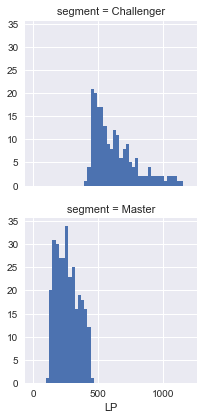

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
grid=sns.FacetGrid(df_500_rank,row="segment")
df_500_rank.LP=df_500_rank.LP.astype("int")
grid.map(plt.hist,"LP",bins=np.linspace(0,1200,50))

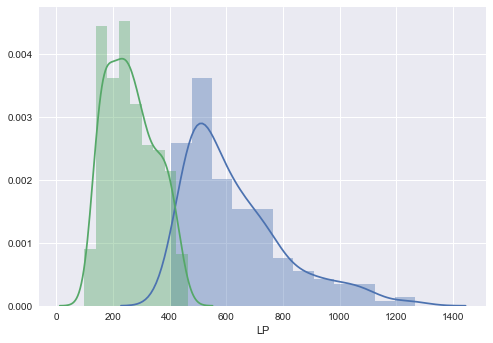

In [77]:
ChallengerLP=df_500_rank["LP"][df_500_rank.segment=="Challenger"]
MasterLP=df_500_rank["LP"][df_500_rank.segment=="Master"]
for col in [ChallengerLP,MasterLP]:
    sns.distplot(col)

In [86]:
print(ChallengerLP.iloc[-1])
print(MasterLP.iloc[0])

406
464


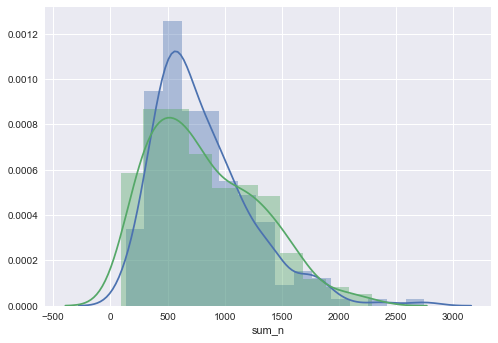

In [89]:
ChallengerSum=df_500_rank["sum_n"][df_500_rank.segment=="Challenger"]
MasterSum=df_500_rank["sum_n"][df_500_rank.segment=="Master"]
for col in [ChallengerSum,MasterSum]:
    sns.distplot(col)

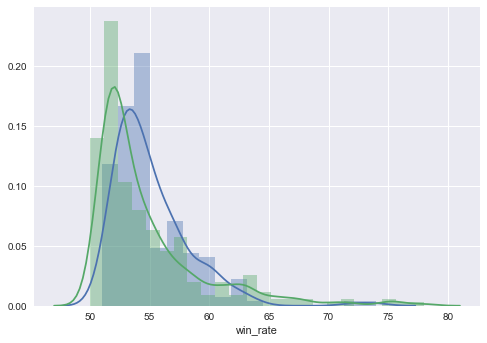

In [93]:
ChallengerWinRate=df_500_rank["win_rate"][df_500_rank.segment=="Challenger"].astype("int")
MasterWinRate=df_500_rank["win_rate"][df_500_rank.segment=="Master"].astype("int")
for col in [ChallengerWinRate,MasterWinRate]:
    sns.distplot(col)

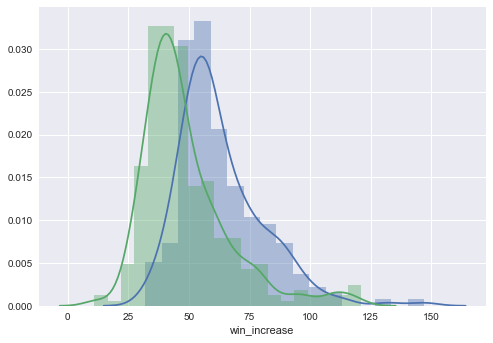

In [98]:
df_500_rank["win_increase"]=df_500_rank.win_n-df_500_rank.lose_n
ChallengerWinInc=df_500_rank["win_increase"][df_500_rank.segment=="Challenger"]
MasterWinInc=df_500_rank["win_increase"][df_500_rank.segment=="Master"]
for col in [ChallengerWinInc,MasterWinInc]:
    sns.distplot(col)

In [100]:
(df_1["win_n"]-df_1["lose_n"])/df_1["s"]

segment
Challenger    63.140000
Master        48.576667
dtype: float64

In [101]:
import pandas as pd
df = pd.DataFrame({"A":["foo", "foo", "foo", "bar"], "B":[0,1,1,1], "C":["A","A","B","A"]})
print(df)
df.groupby(["A", "C"]).filter(lambda df:df.shape[0] == 1)

     A  B  C
0  foo  0  A
1  foo  1  A
2  foo  1  B
3  bar  1  A


,A,B,C
2,foo,1,B
3,bar,1,A
